### Data Collection
Obtaining the required data for the analysis by scraping NCDC website, import data from the JoHn Hopkins repository and importing the provided external data.

### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
#Write Your Code Below
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://covid19.ncdc.gov.ng/'
response = requests.get(url)
print(response.status_code)

200


In [4]:
soup = BeautifulSoup(response.text,"html.parser")

In [5]:
table = soup.find_all("table")

In [6]:
no_rows = []
for row in table[0].find_all("tr"):
    columns = row.find_all("td")
    no_rows.append(columns)

In [8]:
with open("covidnig.csv", "wt") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow([(i.text).strip() for i in table[0].find_all("tr")[0].find_all("th")])
    for i in range (1,(len(no_rows))):
        writer.writerow([(d.text).strip() for d in table[0].find_all("tr")[i].find_all("td")])

In [9]:
#Saving the data to a DataFrame
dfnig = pd.read_csv("covidnig.csv")

### B - John Hopkins Data Repository
Obtaining data from John Hopkins repository through the link below and saving it to a dataframe for futher analysis.  
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [76]:
#df1
confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed_global = pd.read_csv(confirmed_global)

In [14]:
#df2
recovered_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered_global = pd.read_csv(recovered_global)

In [15]:
#df3
deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths_global = pd.read_csv(deaths_global)

### C - External Data 
Saving the external data to a DataFrame

In [16]:
df_external = pd.read_csv('covid_external.csv')

In [17]:
df_budget = pd.read_csv('Budget data.csv')

### Viewing the data
Obtaining basic information about the data using the `head()` and `info()` method.

In [18]:
dfnig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"57,164",292,"56,446",426
1,FCT,"19,513","3,666","15,691",156
2,Plateau,"9,006",75,"8,874",57
3,Kaduna,"8,838",118,"8,655",65
4,Rivers,"6,852",159,"6,595",98


In [19]:
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [72]:
df_confirmed_global.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044
1,Albania,0,0,0,0,0,0,0,0,0,...,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528
2,Algeria,0,0,0,0,0,0,0,0,0,...,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842
3,Andorra,0,0,0,0,0,0,0,0,0,...,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393
4,Angola,0,0,0,0,0,0,0,0,0,...,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558


In [22]:
df_recovered_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,49409,49499,49499,49499,49471,49477,49481,49499,49536,49664
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,76784,77498,78259,79131,79821,80483,81061,81810,82554,83264
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,79319,79428,79556,79672,79783,79887,79994,80103,80219,80347
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10685,10708,10708,10754,10775,10796,10795,10861,10883,10904
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19677,19761,19827,19835,19848,19850,19948,19971,20028,20032


In [23]:
df_deaths_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2451,2451,2451,2454,2454,2457,2459,2460,2460,2462
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1969,1986,2002,2018,2030,2045,2060,2077,2092,2106
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3022,3026,3028,3031,3034,3036,3040,3045,3048,3051
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,112,112,112,112,112,113,113,113,113,113
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,516,516,517,519,520,521,521,522,522,522


In [24]:
df_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,1.0,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,1.0,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.9,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.9,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.9,0.1,0.8,0.8,0.84


In [25]:
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [26]:
df_budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [27]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


### Task 3 - Data Cleaning and Preparation

* Converting to appropriate data type.
* Renaming the columns of the scraped data.
* Removing comma(,) in numerical data and converting it to int datatype.
* Extract daily data for Nigeria from the Global daily cases data.

In [37]:
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


Cleaning scraped data

In [38]:
dfnig.columns = ['states', 'cases_lab_confirmed', 'cases_on_admission', 'discharged', 'deaths']

In [40]:
dfnig.replace(',','',regex=True, inplace=True)

In [45]:
numeric_col=['cases_lab_confirmed', 'cases_on_admission', 'discharged']
dfnig[numeric_col] = dfnig[numeric_col].apply(pd.to_numeric, errors='coerce')

In [46]:
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   cases_lab_confirmed  37 non-null     int64 
 2   cases_on_admission   37 non-null     int64 
 3   discharged           37 non-null     int64 
 4   deaths               37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [96]:
def NigeriaCases(df):
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby('Country/Region').sum().loc['Nigeria']
    df = df.to_frame().reset_index()
    df.columns = ['Date', 'Cases']
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [97]:
confirmed_nig = NigeriaCases(df_confirmed_global)

In [98]:
confirmed_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    422 non-null    datetime64[ns]
 1   Cases   422 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.7 KB


In [99]:
confirmed_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [103]:
recovered_nig = NigeriaCases(df_recovered_global)

In [104]:
recovered_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    422 non-null    datetime64[ns]
 1   Cases   422 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.7 KB


In [105]:
recovered_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [106]:
deaths_nig = NigeriaCases(df_deaths_global)

In [107]:
deaths_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    422 non-null    datetime64[ns]
 1   Cases   422 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.7 KB


In [108]:
deaths_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


### Analysis

Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

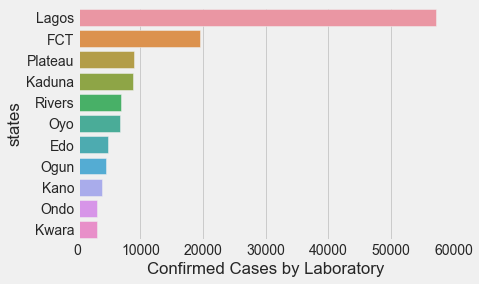

In [114]:
sns.barplot(x='cases_lab_confirmed', y='states', data=dfnig.loc[:10]).set_xlabel(
            "Confirmed Cases by Laboratory")
plt.show()

Top 3 States are Lagos, Abuja and Plateau  (19/03/2021)

Generate a plot that shows the Top 10 states in terms of Discharged Covid cases

Text(0.5, 0, 'Discharged Cases')

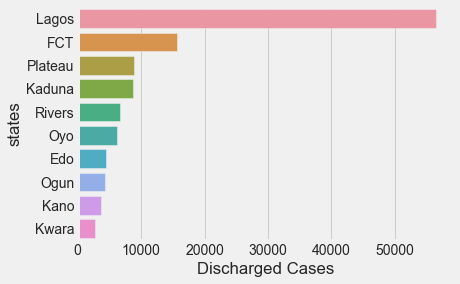

In [123]:
sns.barplot(x='discharged', y='states', data=dfnig.sort_values(['discharged'], ascending=False).loc[:10]).set_xlabel(
            "Discharged Cases")
plt.show()

Plot the top 10 states with active cases

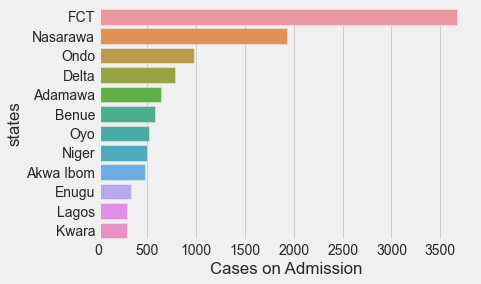

In [125]:
sns.barplot(x='cases_on_admission', y='states', data=dfnig.sort_values(['cases_on_admission'],
                    ascending=False).loc[:10]).set_xlabel("Cases on Admission")
            
plt.show()

FCT has the highest cases on admission despite the highest confirmed cases is in Lagos

Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

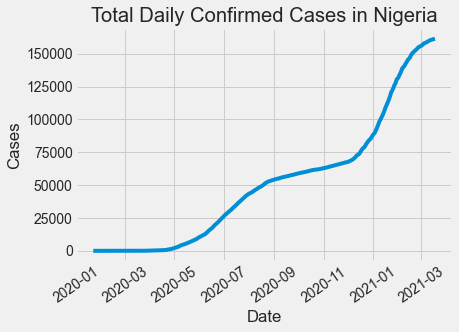

In [128]:
# Total daily confirmed cases in Nigeria
sns.lineplot(x='Date', y='Cases', data=confirmed_nig)
plt.xticks(rotation=35)
plt.title("Total Daily Confirmed Cases in Nigeria")
plt.show()

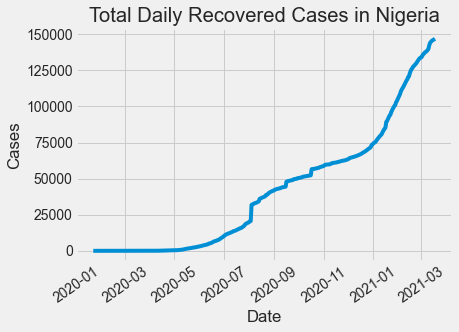

In [129]:
# Total daily recovered cases in Nigeria
sns.lineplot(x='Date', y='Cases', data=recovered_nig)
plt.xticks(rotation=35)
plt.title("Total Daily Recovered Cases in Nigeria")
plt.show()

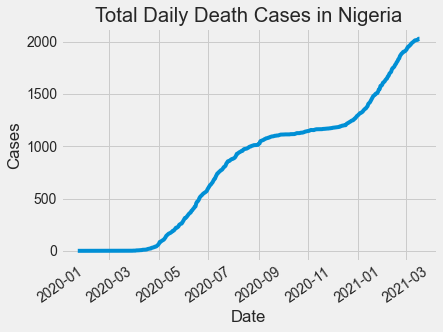

In [130]:
# Total daily death cases in Nigeria
sns.lineplot(x='Date', y='Cases', data=deaths_nig)
plt.xticks(rotation=35)
plt.title("Total Daily Death Cases in Nigeria")
plt.show()

Generating a line plot for the daily infection rate

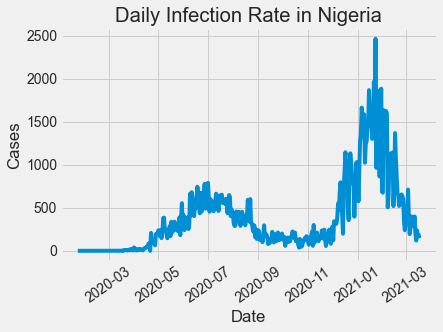

In [134]:
y = confirmed_nig['Cases'].diff()
sns.lineplot(x='Date', y=y, data=confirmed_nig)
plt.xticks(rotation=35)
plt.title("Daily Infection Rate in Nigeria")
plt.show()

The maximum rate is observed to be around January 2021

Maximum number of new cases and the date

In [135]:
y.max()

2464.0

In [141]:
confirmed_nig['IFR'] = confirmed_nig['Cases'].diff()
confirmed_nig.loc[confirmed_nig['IFR'] == y.max()]

,Date,Cases,IFR
367,2021-01-23,120602,2464.0


The maximum infection rate 2464 was recorded on 23rd of January, 2021. Although, there was a mixed up on NCDC official twitter account on the previous day as two different result was published.
  * 2021-01-22: Total confirmed = 118,138
  * 2021-01-22: Total confirmed = 118,969
  * 2021-01-23: Total confirmed = 120,602

The john Hopkins University picked 118,138 for 2021-01-22 to arrive at the confirmed cases.

Relationship between the external dataset and the NCDC COVID-19 dataset.

In [144]:
df_join = pd.merge(dfnig, df_external, how='outer', on=['states'])

In [145]:
df_join.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,57164.0,292.0,56446.0,426.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19513.0,3666.0,15691.0,156.0,North Central,4865000.0,0.3,0.0,0.9,0.4,1.0,0.9,0.6,0.2,0.79
2,Plateau,9006.0,75.0,8874.0,57.0,North Central,4766000.0,0.4,0.5,0.4,0.8,1.0,0.3,0.5,0.3,0.93
3,Kaduna,8838.0,118.0,8655.0,65.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.6,0.4,0.6,0.4,0.86
4,Rivers,6852.0,159.0,6595.0,98.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.3,0.9,0.1,0.1,1.00


In [146]:
df_tcases = df_join.nlargest(11, 'cases_lab_confirmed')

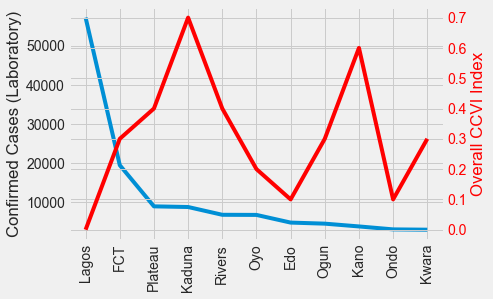

In [148]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_tcases['states'], df_tcases['cases_lab_confirmed'])
ax1.set_ylabel('Confirmed Cases (Laboratory)')
ax2 = ax1.twinx()
ax2.plot(df_tcases['states'], df_tcases['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.show()

Observation

The states with the highest vulnerabilty index are the northen states

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Lagos'),
  Text(1, 0, 'FCT'),
  Text(2, 0, 'Plateau'),
  Text(3, 0, 'Kaduna'),
  Text(4, 0, 'Rivers'),
  Text(5, 0, 'Oyo'),
  Text(6, 0, 'Edo'),
  Text(7, 0, 'Ogun'),
  Text(8, 0, 'Kano'),
  Text(9, 0, 'Ondo'),
  Text(10, 0, 'Kwara')])

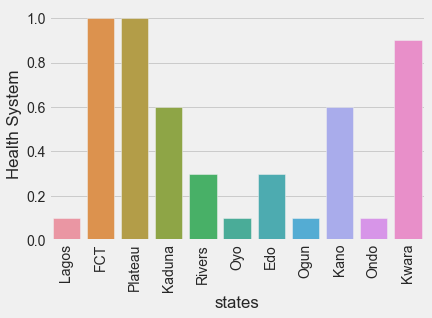

In [150]:
sns.barplot(x='states', y='Health System', data=df_tcases)
plt.xticks(rotation=90)